Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

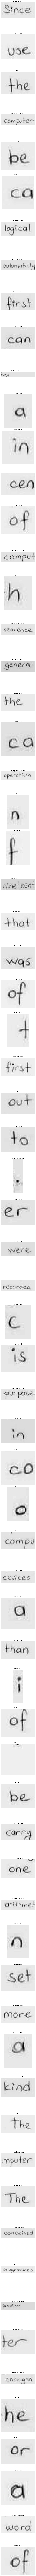

In [8]:
import os
from PIL import Image
import torch
from transformers import VisionEncoderDecoderModel, TrOCRProcessor
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and processor
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model.to(device)
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")

# Folder containing images
image_folder = "word_imgs/"

# Lists to store image names and their corresponding predictions
image_names = []
predictions = []

# Function to process and extract text from an image
def extract_text_from_image(image_path):
    try:
        image = Image.open(image_path).convert("RGB")  # Ensure RGB mode
        pixel_values = processor(images=image, return_tensors="pt").pixel_values
        pixel_values = pixel_values.to(device)

        # Generate text
        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
        return generated_text
    except Exception as e:
        return f"Error processing {image_path}: {e}"

# Process all images in the folder
for filename in os.listdir(image_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(image_folder, filename)
        text = extract_text_from_image(image_path)
        image_names.append(filename)
        predictions.append(text)

# Plot the images and their predictions
fig, axes = plt.subplots(len(image_names), 1, figsize=(5, 5 * len(image_names)))

for i, ax in enumerate(axes):
    image_path = os.path.join(image_folder, image_names[i])
    image = Image.open(image_path)
    
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Prediction: {predictions[i]}")
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()
